Here, you develop the exact spatial derivative operator and its unit test.

In [1]:
import os.path
from scipy import *
import numpy as np
from numpy import *
from numpy import linalg as LA
from scipy import linalg as LA2
import sympy as sympy
import sys as sys
import time
import matplotlib.pyplot as plt
import itertools as it
from IPython.core.display import HTML


sys.path.append('/Users/sashacurcic/SashasDirectory/ANAG/FV_MG/')
from Modules import BasicTools as BT
from Modules import WaveTools as WT
from Modules import PlotTools as PT
from Modules import FFTTools as FFTT
from Modules import OperatorTools as OT
from Modules import GridTransferTools as GTT
from Modules import TestTools as TT
from Modules import SolverTools as ST
from Modules import WaveformTools as WFT

display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions( linewidth = 10000, threshold = 100000)

In [2]:
nh = 8
refRatio = 2
c = 1.
CFL = 0.5
nt = 1
RK = 4
deriv = 'CD'
order = 0
mu = 0.5
sigma = .3
wavenumber = 7

In [3]:
omega = BT.Grid(nh)
finehalf = list(np.arange(int(nh / refRatio)) + int(nh / refRatio))
# omega.AddPatch(refRatio, finehalf)
nh_max = omega.nh_max
nh_min = omega.nh_min
degFreed = omega.degFreed
waves = WT.MakeWaves(omega)
nullspace = OT.FindNullspace(omega, waves)
t = 0

In [4]:
# For Gaussian:
waveform = WFT.Gauss(omega, sigma, mu)
waveDeriv = WFT.Gauss(omega, sigma, mu, deriv = 1)

# For Gaussian wavepacket:
# waveform = WFT.WavePacket(omega, sigma, mu, wavenumber, waves)
# waveDeriv = WFT.WavePacket(omega, sigma, mu, wavenumber, waves, deriv = 1)

okay = np.zeros(degFreed, float)
okay[wavenumber] = 1

testDeriv = TT.ExactSpatDeriv(omega, t, waveform, -1, order)

FCoefs = FFTT.FourierCoefs(omega, waves @ nullspace, waveform)
FCoefsDeriv = FFTT.FourierCoefs(omega, waves @ nullspace, waveDeriv)
FCoefsTest = FFTT.FourierCoefs(omega, waves @ nullspace, testDeriv)
allCoefs = PT.Load(FCoefs, FCoefsDeriv, FCoefsTest)
labels = ['Initial Waveform', 'Exact Derivative', 'Fourier Derivative']
print(waves[:, wavenumber])
print('')
print(waves)
print('')

[[ 0. -0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -2.  0.  0.  0.]
 [ 0.  0.  0.  2.  0. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -3.  0.]
 [ 0.  0.  0.  0.  0.  3.  0. -0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[ 0.63661977 -0.63661977  0.63661977 -0.63661977  0.63661977 -0.63661977  0.63661977 -0.63661977]

[[ 1.          0.37292323  0.90031632  0.63661977  0.63661977  0.72451862  0.30010544  0.63661977]
 [ 1.          0.90031632  0.37292323  0.63661977 -0.63661977 -0.30010544 -0.72451862 -0.63661977]
 [ 1.          0.90031632 -0.37292323 -0.63661977 -0.63661977 -0.30010544  0.72451862  0.63661977]
 [ 1.          0.37292323 -0.90031632 -0.63661977  0.63661977  0.72451862 -0.30010544 -0.63661977]
 [ 1.         -0.37292323 -0.90031632  0.63661977  0.63661977 -0.72451862 -0.30010544  0.63661977]
 [ 1.         -0.90031632 -0.37292323  0.63661977 -0.63661977  0.30010544  0.72451862 -0.63661977]
 [ 1.         -0.90031632 

Are you *sure* your labels are ordered correctly?
This image has been saved under /Users/sashacurcic/SashasDirectory/ANAG/FV_MG/Figures/GaussTest.


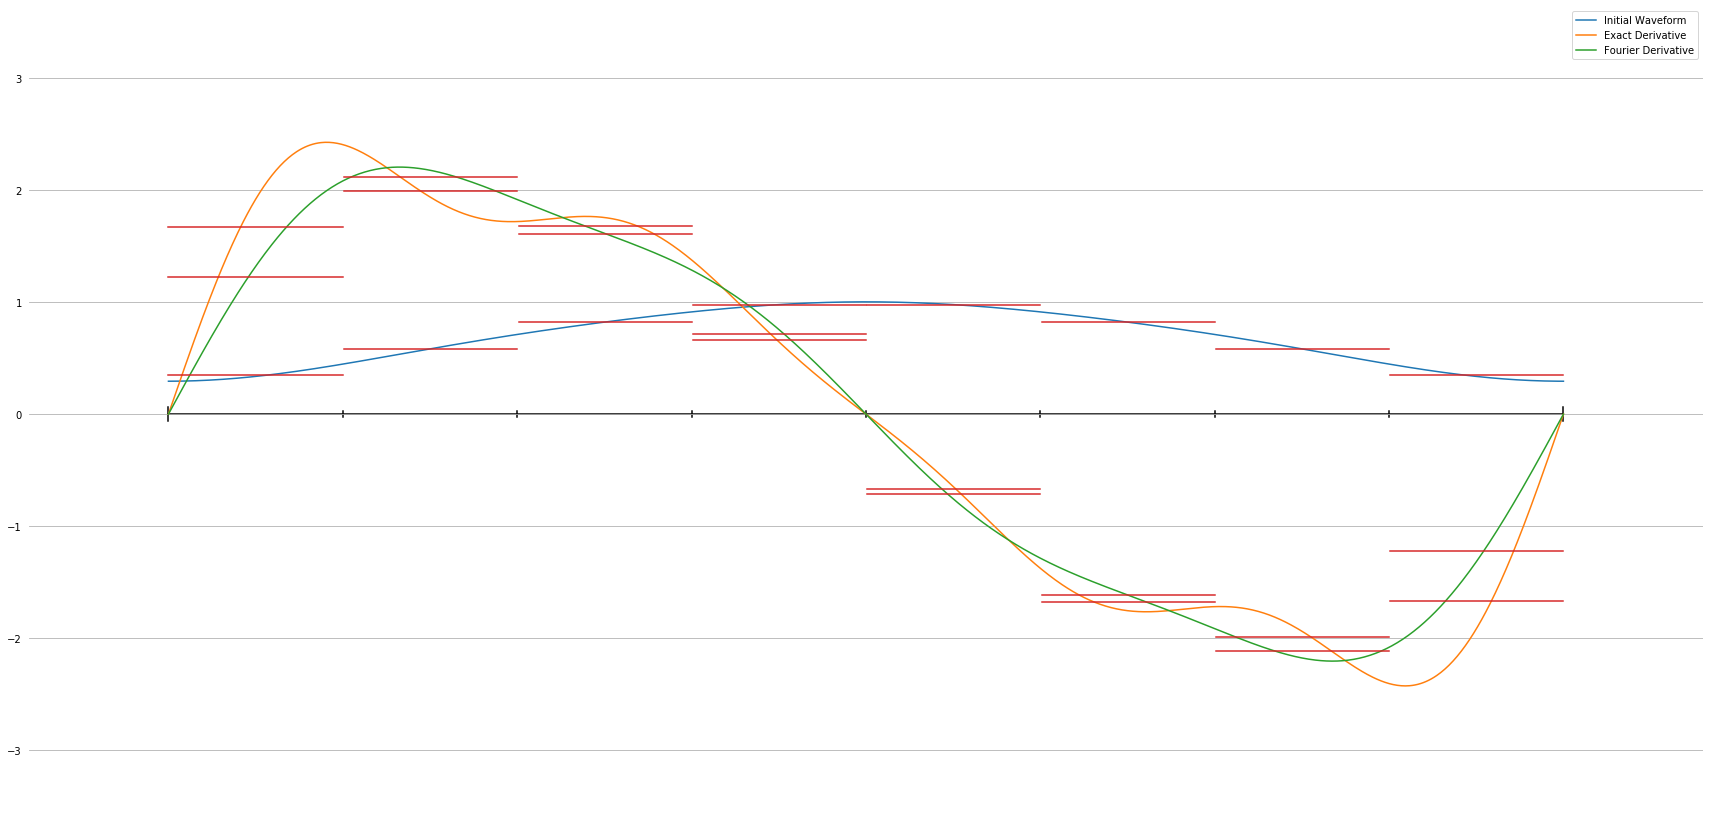

In [5]:
PT.PlotMixedWave(omega, waves, nullspace @ allCoefs, rescale = 6, yGrid = True, labels = labels, saveName = 'GaussTest', dpi = 300)
